In [1]:
import sys
print(sys.executable)

/home/juju/miniconda3/envs/bbo/bin/python


## Run the bash file for result save in {folder}
(need to change in BOTH run_result1.py and runresult_juju.sh)

In [2]:
!sh ./experiments/runresult_juju.sh

Start f:sphere-4d random
Finish
Start f:sphere-4d sobol
Finish


## Plot result

In [3]:
from experiments.plot_nbu import plot_results

Iter rounds: 30 /home/juju/projects/bbo/results/exp_test/sphere_4d/sobol
Iter rounds: 30 /home/juju/projects/bbo/results/exp_test/sphere_4d/random


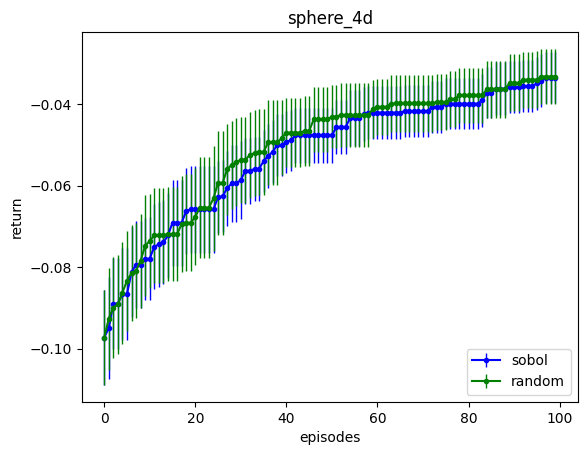

In [4]:
plot_results("exp_test","sphere_4d")

## Test for initial steps

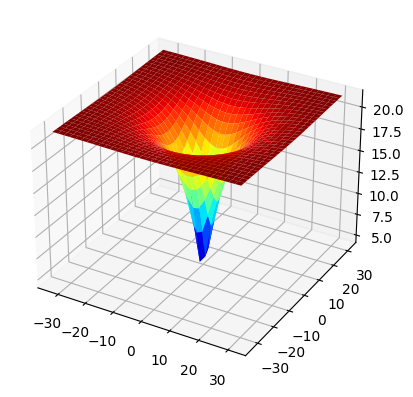

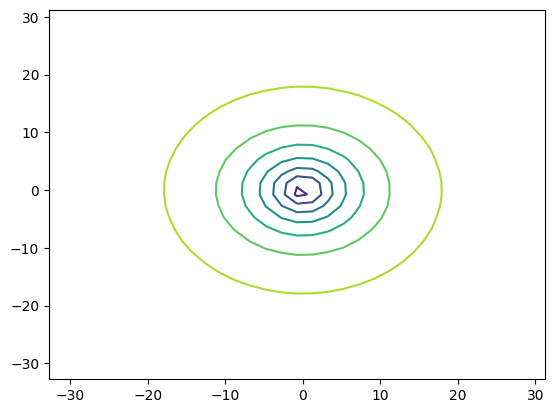

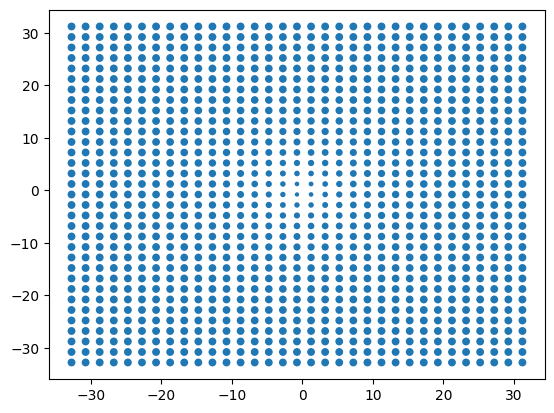

In [8]:
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
import matplotlib.pyplot as plt

def objective(x, y):
 return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2)))-exp(0.5 * (cos(2 * 
  pi * x)+cos(2 * pi * y))) + e + 20


r_min, r_max = -32.768, 32.768
xaxis = arange(r_min, r_max, 2.0)
yaxis = arange(r_min, r_max, 2.0)
x, y = meshgrid(xaxis, yaxis)
results = objective(x, y)
figure = plt.figure()
axis = plt.subplot( projection='3d')
axis.plot_surface(x, y, results, cmap='jet', shade= "false")
plt.show()
plt.contour(x,y,results)
plt.show()
plt.scatter(x, y, results)
plt.show()